# Jared Waldroff

## Research question/interests

Briefly describe your research question or interests here.

1. Does having a more aggressive play style using demolitions correlate with the amount of goals a team gets.
2. Does having more shots on net correlate with more wins.

# Task 1

AxesSubplot(0.1,0.15;0.8x0.75)


,demo_inflicted,core_goals
0,6.0,9.0
1,7.0,5.0
2,11.0,21.0
3,7.0,4.0
4,13.0,12.0
...,...,...
10589,19.0,18.0
10590,22.0,14.0
10591,15.0,5.0
10592,11.0,10.0


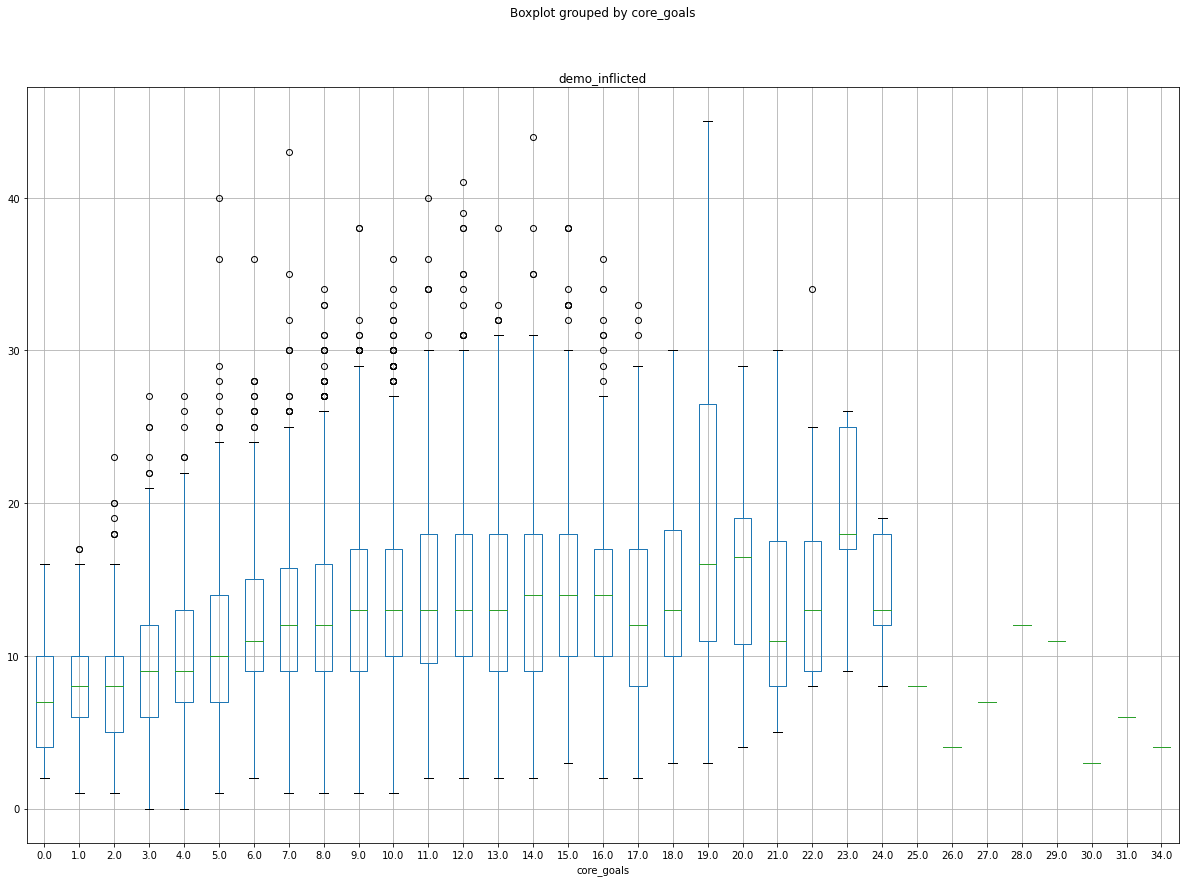

In [14]:
import pandas as pd
import seaborn as sns

data_set = pd.read_csv('../data/raw/matches_by_teams.csv')

m3_data_set = data_set[['demo_inflicted','core_goals']]

x = m3_data_set.boxplot('demo_inflicted','core_goals', figsize = (20,14))

print(x)

m3_data_set


# Demos Inflicted & Goals Scored

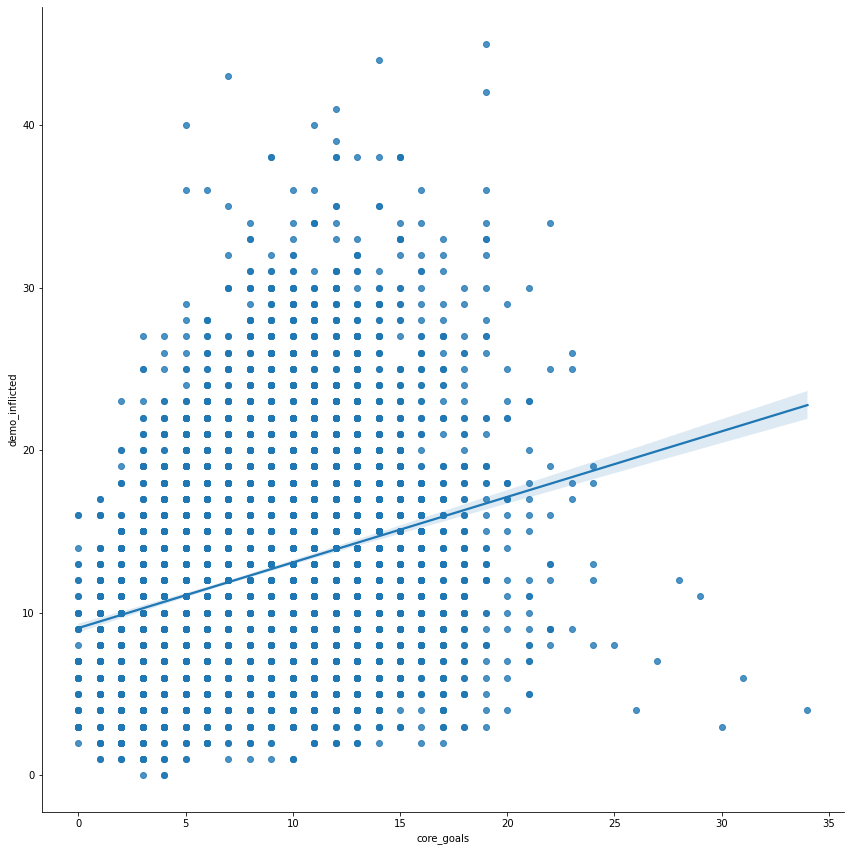

In [13]:
y = sns.pairplot(
    m3_data_set,
    x_vars = ['core_goals'],
    y_vars = ['demo_inflicted'],
    height = 12,
    aspect = 1,
    kind = 'reg'
)

print(y)

# Demo Inflicted & Core Goals - Histograms

array([[<AxesSubplot:title={'center':'demo_inflicted'}>,
        <AxesSubplot:title={'center':'core_goals'}>]], dtype=object)

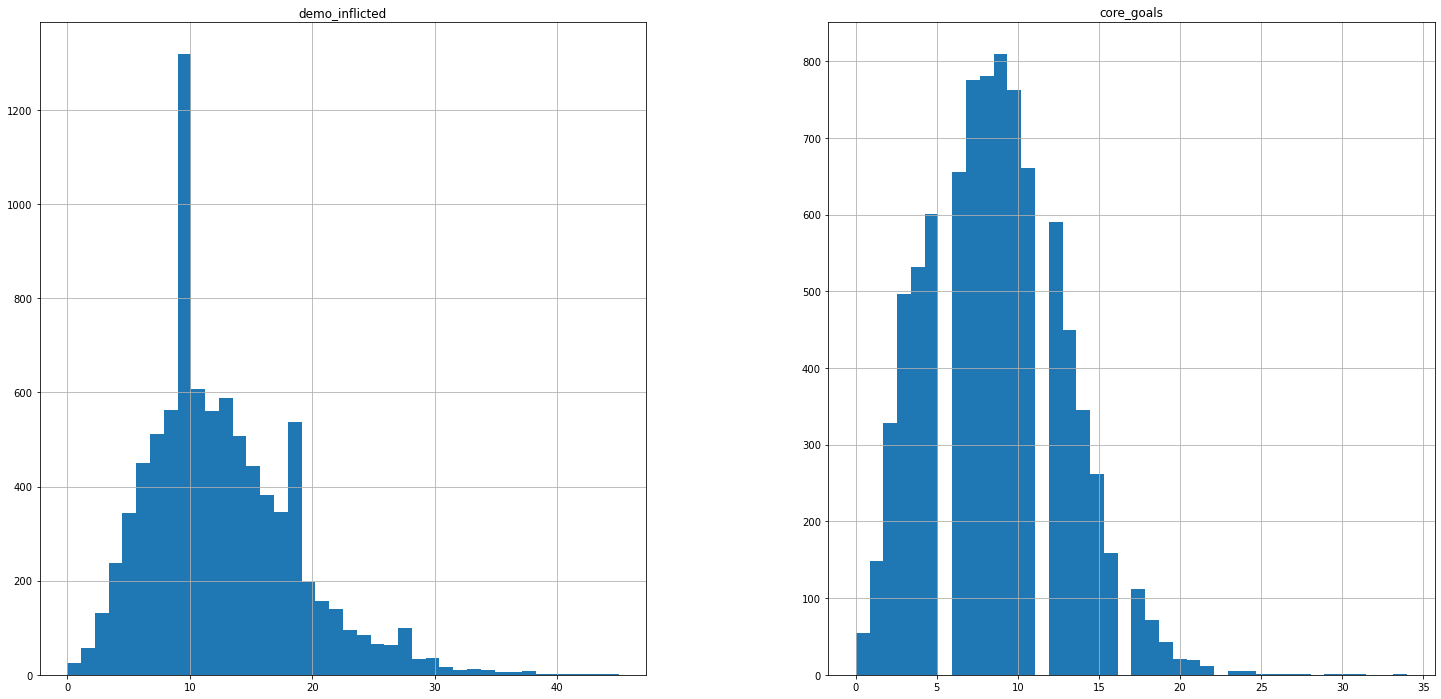

In [ ]:
m3_data_set.hist(bins=40,figsize =(25,12))

# Goals & Shots Taken on Net

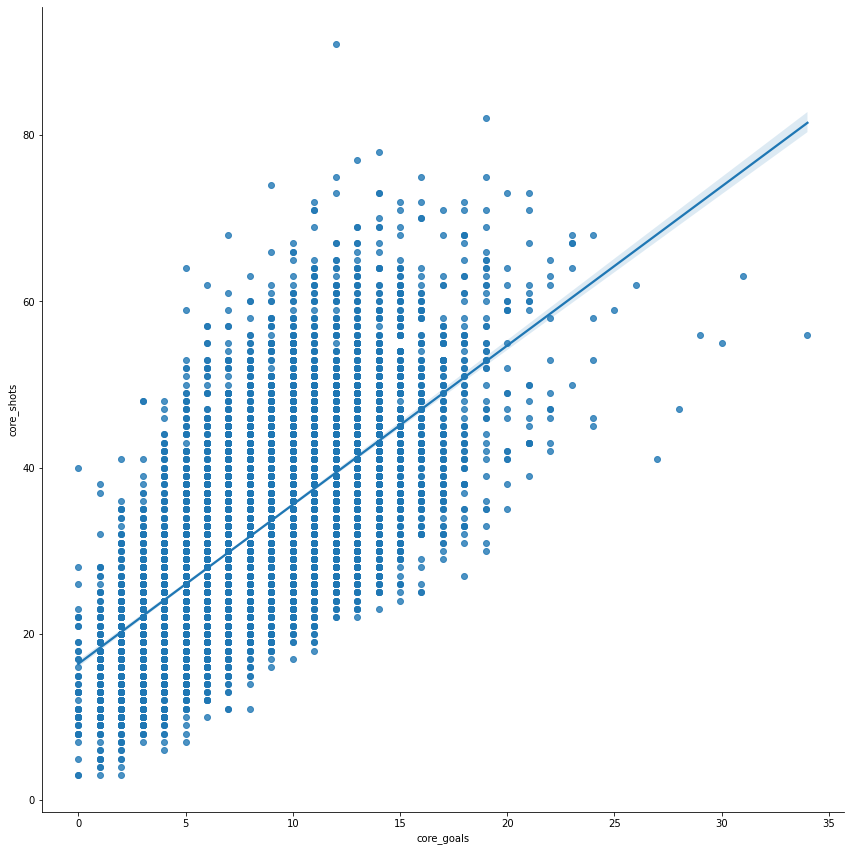

In [12]:
z = sns.pairplot(
    data_set,
    x_vars = ['core_goals'],
    y_vars = ['core_shots'],
    height = 12,
    aspect = 1,
    kind = 'reg'
)

print(z)

# Distance Traveled & Goals Scored

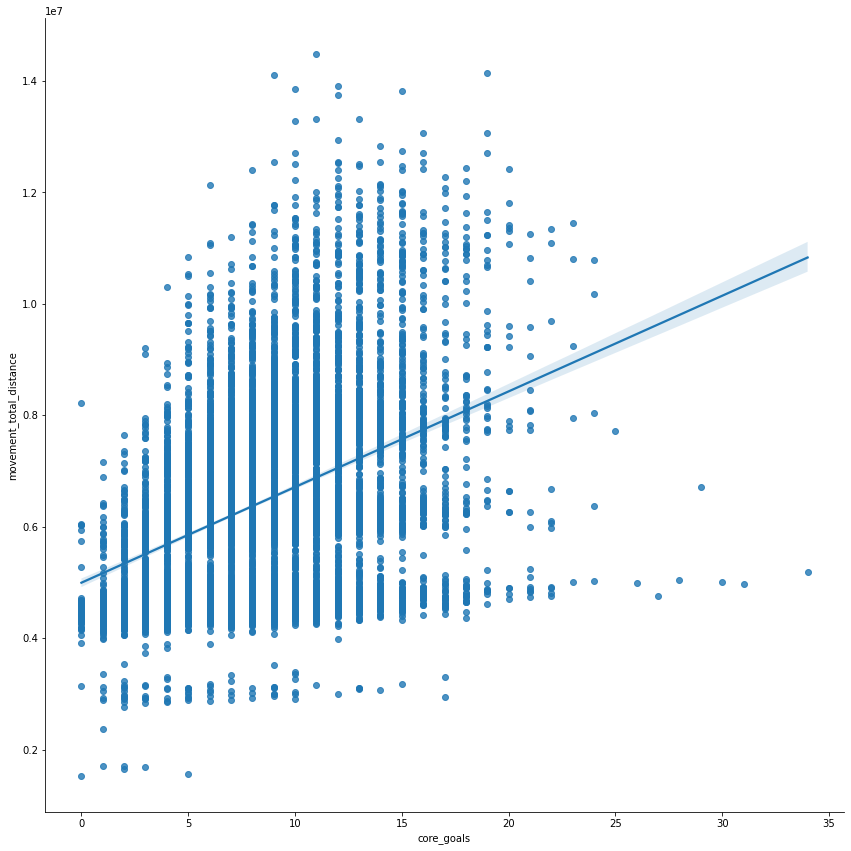

In [15]:
b = sns.pairplot(
    data_set,
    x_vars = ['core_goals'],
    y_vars = ['movement_total_distance'],
    height = 12,
    aspect = 1,
    kind = 'reg'
)

print(b)

In [ ]:
"""
Here I'm looking at goals scored vs. demolitions done against the oposing team. I wanted to know if being more aggressive in the game would result in scoring more goals.
Based on the three charts it is shown that teams who score 9 goals are the most aggressive. Once teams start getting better and scoring more goals they seem to commit not as many demolitions.
This could be because the players get better and they are harder to hit or this could because players who focus on scoring more goals don't end up focusing as much on demolitions.
This is mainly shown in the third diagram. The first two diagrams seem to show a tapering off around 9 goals scored. I was also curious about the relationship
between the amount of shots a team took, distance travelled and the amount of goals they scored. As seen in the final 2 diagrams it seems as though there is a direct correlation between
the amount of shots a team takes, the distance they travel and the amount of goals scored. From this analysis I can conclude that using a strategy in Rocket League that is heavily focused
on taking shots on net, moving around the map as much as possible and committing no more than 9 demolitions will result in the most goals scored.
"""

# Task 2

In [ ]:
import pandas as pd

m3_data_set = pd.read_csv('../data/raw/matches_by_teams.csv')

clean_data = m3_data_set.drop(columns=['match_id',
            'team_id',
            'team_slug',
            'color',
            'positioning_time_neutral_third',
            'positioning_time_offensive_third',
            'positioning_time_defensive_half',
            'positioning_time_offensive_half',
            'movement_time_powerslide',
            'positioning_time_defensive_third',
            'positioning_time_behind_ball',
            'positioning_time_in_front_ball',
            'movement_time_slow_speed',
            'movement_time_ground',
            'movement_time_low_air',
            'boost_time_boost_75_100',
            'core_score',
            'core_shooting_percentage',
            'movement_time_boost_speed',
            'boost_amount_stolen_big',
            'boost_amount_stolen_small',
            'boost_amount_collected_small',
            'boost_amount_stolen',
            'boost_bpm',
            'boost_bcpm',
            'boost_avg_amount',
            'boost_amount_collected',
            'boost_count_collected_big',
            'boost_count_collected_small',
            'boost_count_stolen_small',
            'boost_count_stolen_big',
            'boost_amount_collected_big',
            'boost_amount_overfill',
            'boost_amount_overfill_stolen',
            'boost_amount_used_while_supersonic',
            'boost_time_boost_0_25',
            'boost_time_boost_25_50',
            'boost_time_boost_50_75',
            'boost_time_zero_boost'
])

clean_data_remove_columns = clean_data.dropna()

clean_data_change_names = clean_data_remove_columns.rename(columns={
    'team_name':'Team Name',
    'team_region':'Team Region',
    'core_shots':'Shots',
    'core_goals':'Goals',
    'core_saves':'Saves',
    'core_assists':'Assists',
    'boost_time_full_boost':'Time at Full Boost',
    'movement_total_distance':'Total Distance Moved',
    'movement_time_supersonic_speed':'Time at Supersonic Speed',
    'movement_time_high_air':'Time in High Air',
    'movement_count_powerslide':'Powerslide Distance',
    'demo_inflicted':'Demos Inflicted',
    'demo_taken':'Demos Taken',
    'score':'Score',
    'winner':'Winner'
})

clean_data_change_names



,Team Name,Team Region,Shots,Goals,Saves,Assists,Time at Full Boost,Total Distance Moved,Time at Supersonic Speed,Time in High Air,Powerslide Distance,Demos Inflicted,Demos Taken,Score,Winner
0,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,370.91,4694698.0,578.77,210.83,840.0,6.0,7.0,3.0,True
1,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,313.00,4774768.0,614.48,175.53,702.0,7.0,6.0,0.0,False
2,RENEGADES,Oceania,46.0,21.0,10.0,21.0,311.35,5098012.0,600.10,238.28,767.0,11.0,7.0,3.0,True
3,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,278.31,4893312.0,542.23,174.47,551.0,7.0,11.0,0.0,False
4,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,796.05,6680885.0,644.94,290.85,1020.0,13.0,8.0,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,TEAM BDS,Europe,61.0,18.0,29.0,14.0,688.01,10010525.0,1011.67,523.30,1017.0,19.0,13.0,4.0,True
10590,G2 ESPORTS,North America,46.0,14.0,38.0,12.0,554.70,9022216.0,1023.51,485.48,1594.0,22.0,15.0,4.0,True
10591,FAZE CLAN,North America,50.0,5.0,26.0,4.0,620.84,8961362.0,963.24,459.89,1440.0,15.0,22.0,2.0,False
10592,TEAM BDS,Europe,36.0,10.0,19.0,8.0,488.50,7387374.0,731.29,355.54,793.0,11.0,21.0,4.0,True


# Task 3 - Step 1

In [18]:
import pandas as pd
import numpy as np

df = (
    pd.DataFrame(data = pd.read_csv('../data/raw/matches_by_teams.csv'))
    .drop(columns = [
        'match_id',
        'team_id',
        'team_slug',
        'color',
        'positioning_time_neutral_third',
        'positioning_time_offensive_third',
        'positioning_time_defensive_half',
        'positioning_time_offensive_half',
        'movement_time_powerslide',
        'positioning_time_defensive_third',
        'positioning_time_behind_ball',
        'positioning_time_in_front_ball',
        'movement_time_slow_speed',
        'movement_time_ground',
        'movement_time_low_air',
        'boost_time_boost_75_100',
        'core_score',
        'core_shooting_percentage',
        'movement_time_boost_speed',
        'boost_amount_stolen_big',
        'boost_amount_stolen_small',
        'boost_amount_collected_small',
        'boost_amount_stolen',
        'boost_bpm',
        'boost_bcpm',
        'boost_avg_amount',
        'boost_amount_collected',
        'boost_count_collected_big',
        'boost_count_collected_small',
        'boost_count_stolen_small',
        'boost_count_stolen_big',
        'boost_amount_collected_big',
        'boost_amount_overfill',
        'boost_amount_overfill_stolen',
        'boost_amount_used_while_supersonic',
        'boost_time_boost_0_25',
        'boost_time_boost_25_50',
        'boost_time_boost_50_75',
        'boost_time_zero_boost'
    ])
    .assign(DemosPerGoal=lambda x: x.demo_inflicted / x.core_goals).round(2)
    .assign(ShotsPerGoal=lambda x: x.core_shots / x.core_goals).round(2)
    .rename(columns = {
        'team_name':'Team Name',
        'team_region':'Team Region',
        'core_shots':'Shots',
        'core_goals':'Goals',
        'core_saves':'Saves',
        'core_assists':'Assists',
        'boost_time_full_boost':'Time at Full Boost',
        'movement_total_distance':'Total Distance Moved',
        'movement_time_supersonic_speed':'Time at Supersonic Speed',
        'movement_time_high_air':'Time in High Air',
        'movement_count_powerslide':'Powerslide Distance',
        'demo_inflicted':'Demos Inflicted',
        'demo_taken':'Demos Taken',
        'score':'Score',
        'winner':'Winner',
        'DemosPerGoal':'Demos Per Goal'
    })
    .dropna(how='any',axis=0)
)
            
df

,Team Name,Team Region,Shots,Goals,Saves,Assists,Time at Full Boost,Total Distance Moved,Time at Supersonic Speed,Time in High Air,Powerslide Distance,Demos Inflicted,Demos Taken,Score,Winner,Demos Per Goal,ShotsPerGoal
0,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,370.91,4694698.0,578.77,210.83,840.0,6.0,7.0,3.0,True,0.67,3.78
1,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,313.00,4774768.0,614.48,175.53,702.0,7.0,6.0,0.0,False,1.40,3.00
2,RENEGADES,Oceania,46.0,21.0,10.0,21.0,311.35,5098012.0,600.10,238.28,767.0,11.0,7.0,3.0,True,0.52,2.19
3,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,278.31,4893312.0,542.23,174.47,551.0,7.0,11.0,0.0,False,1.75,4.00
4,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,796.05,6680885.0,644.94,290.85,1020.0,13.0,8.0,3.0,True,1.08,3.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,TEAM BDS,Europe,61.0,18.0,29.0,14.0,688.01,10010525.0,1011.67,523.30,1017.0,19.0,13.0,4.0,True,1.06,3.39
10590,G2 ESPORTS,North America,46.0,14.0,38.0,12.0,554.70,9022216.0,1023.51,485.48,1594.0,22.0,15.0,4.0,True,1.57,3.29
10591,FAZE CLAN,North America,50.0,5.0,26.0,4.0,620.84,8961362.0,963.24,459.89,1440.0,15.0,22.0,2.0,False,3.00,10.00
10592,TEAM BDS,Europe,36.0,10.0,19.0,8.0,488.50,7387374.0,731.29,355.54,793.0,11.0,21.0,4.0,True,1.10,3.60


# Task 3 - Part 2

In [31]:
def load_and_process(path):
                     
    # Method Chain 1 (Load data and deal with missing data)
                     
    df1 = (
        pd.read_csv(path)
        .rename(columns = {
            'team_name':'Team Name',
            'team_region':'Team Region',
            'core_shots':'Shots',
            # 'core_goals':'Goals',
            'core_saves':'Saves',
            'core_assists':'Assists',
            'boost_time_full_boost':'Time at Full Boost',
            'movement_total_distance':'Total Distance Moved',
            'movement_time_supersonic_speed':'Time at Supersonic Speed',
            'movement_time_high_air':'Time in High Air',
            'movement_count_powerslide':'Powerslide Distance',
            # 'demo_inflicted':'Demos Inflicted',
            'demo_taken':'Demos Taken',
            'score':'Score',
            'winner':'Winner',
            'DemosPerGoal':'Demos Per Goal'
        })
        .dropna(how='any',axis=0)
          )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
        .assign(DemosPerGoal=lambda x: x.demo_inflicted / x.core_goals).round(2)
        .assign(ShotsPerGoal=lambda x: x.Shots / x.core_goals).round(2)
        .drop(columns = [
            'match_id',
            'team_id',
            'team_slug',
            'color',
            'positioning_time_neutral_third',
            'positioning_time_offensive_third',
            'positioning_time_defensive_half',
            'positioning_time_offensive_half',
            'movement_time_powerslide',
            'positioning_time_defensive_third',
            'positioning_time_behind_ball',
            'positioning_time_in_front_ball',
            'movement_time_slow_speed',
            'movement_time_ground',
            'movement_time_low_air',
            'boost_time_boost_75_100',
            'core_score',
            'core_shooting_percentage',
            'movement_time_boost_speed',
            'boost_amount_stolen_big',
            'boost_amount_stolen_small',
            'boost_amount_collected_small',
            'boost_amount_stolen',
            'boost_bpm',
            'boost_bcpm',
            'boost_avg_amount',
            'boost_amount_collected',
            'boost_count_collected_big',
            'boost_count_collected_small',
            'boost_count_stolen_small',
            'boost_count_stolen_big',
            'boost_amount_collected_big',
            'boost_amount_overfill',
            'boost_amount_overfill_stolen',
            'boost_amount_used_while_supersonic',
            'boost_time_boost_0_25',
            'boost_time_boost_25_50',
            'boost_time_boost_50_75',
            'boost_time_zero_boost'])
        .rename(columns = {
            'core_goals':'Goals',
            'demo_inflicted':'Demos Inflicted',
            'DemosPerGoal':'Demos Per Goal',
            'ShotsPerGoal':'Shots Per Goal'})
        
      )

    # Rreturn the latest dataframe

    return df2 

In [32]:
load_and_process('../data/raw/matches_by_teams.csv')


,Team Name,Team Region,Shots,Goals,Saves,Assists,Time at Full Boost,Total Distance Moved,Time at Supersonic Speed,Time in High Air,Powerslide Distance,Demos Inflicted,Demos Taken,Score,Winner,Demos Per Goal,Shots Per Goal
0,GROUND ZERO GAMING,Oceania,34.0,9.0,8.0,7.0,370.91,4694698.0,578.77,210.83,840.0,6.0,7.0,3.0,True,0.67,3.78
1,RANGA ROUNDUP,Oceania,15.0,5.0,21.0,3.0,313.00,4774768.0,614.48,175.53,702.0,7.0,6.0,0.0,False,1.40,3.00
2,RENEGADES,Oceania,46.0,21.0,10.0,21.0,311.35,5098012.0,600.10,238.28,767.0,11.0,7.0,3.0,True,0.52,2.19
3,TRIDENT ESPORTS,Oceania,16.0,4.0,16.0,3.0,278.31,4893312.0,542.23,174.47,551.0,7.0,11.0,0.0,False,1.75,4.00
4,DIRE WOLVES,Oceania,46.0,12.0,13.0,9.0,796.05,6680885.0,644.94,290.85,1020.0,13.0,8.0,3.0,True,1.08,3.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,TEAM BDS,Europe,61.0,18.0,29.0,14.0,688.01,10010525.0,1011.67,523.30,1017.0,19.0,13.0,4.0,True,1.06,3.39
10590,G2 ESPORTS,North America,46.0,14.0,38.0,12.0,554.70,9022216.0,1023.51,485.48,1594.0,22.0,15.0,4.0,True,1.57,3.29
10591,FAZE CLAN,North America,50.0,5.0,26.0,4.0,620.84,8961362.0,963.24,459.89,1440.0,15.0,22.0,2.0,False,3.00,10.00
10592,TEAM BDS,Europe,36.0,10.0,19.0,8.0,488.50,7387374.0,731.29,355.54,793.0,11.0,21.0,4.0,True,1.10,3.60


# Task 3 - Part 3

## Uploaded Project Function 2

# Task 4
### Looking at the data from the beginning of Task 1 I was able to see the relation of an agressive play style using demolitions, shots and movement to scoring
### goals in game. This play style seems to be useful up until a certain point. Once a team get beyond 9 demolitions a game it doesn't seem to increase the
### probability of a team scoring more goals. It looks to taper off. I decided that it would be a good idea to look at shots and how that may affect a team's ability
### to score goals. Based on the last diagram I have in Task 1 it seems that there is a direct correlation between shots taken, movement made and goals scored.
### If you want to score more goals in Rocket league it's better to focus on shots on net and more movement rather than committing demolitions on your opponent.
###